In [693]:
import numpy as np
import pandas as pd

In [694]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [695]:
df.shape

(614, 13)

In [696]:
# There are 614 Rows and 13 column in this data set.
# Loan_status is our target variable and other are feature (Input variable)

# Preprocessing

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [698]:
df.columns # Checking column name 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [699]:
df.nunique() # Checking total unique values

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [700]:
df['Loan_Status'].unique() # Checking unique vallues of our target variable 

array(['Y', 'N'], dtype=object)

In [701]:
# Our target variable having only 02 class. Y or N. so this problem is classification 

In [702]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [703]:
# This data set has null values in maximum column. so we will deal with them first.

In [704]:
# Dropping Loan ID as it is nominal featur only.
df=df.drop(['Loan_ID'],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [705]:
df.duplicated().sum() # Checking duplicates.

0

In [706]:
# There is no any duplicate data in this data set.

In [707]:
# Now we will deal with null values with fillna method. Mean for continuous data and mode for categorical data.

df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [708]:
# NOw we will deal with continous data with mean method.
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [709]:
# Now again check null values in data set.
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [710]:
# Now there is no any null value in this data set. and we can proceed further.

# EDA and Visualization

In [711]:
# In Exploratory Data Analysis we will plot countplot to check the counts of categorical features.

# Importing necessary library

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Male      502
Female    112
Name: Gender, dtype: int64


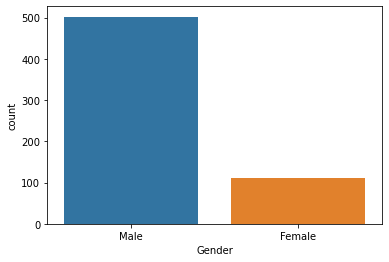

In [712]:
# Checking Gender column
sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

In [713]:
# from above plot we can say that out 614 person, 502 are male and 112 are female candidate who have applied for loan

Yes    401
No     213
Name: Married, dtype: int64


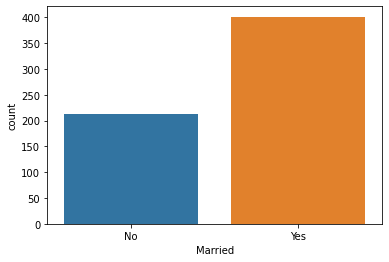

In [714]:
# Checking Married column
sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

In [715]:
# from above plot we can say that out 614 person, 401 are married and 213 are unmarried  who have applied for loan.
# Majority is married person.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


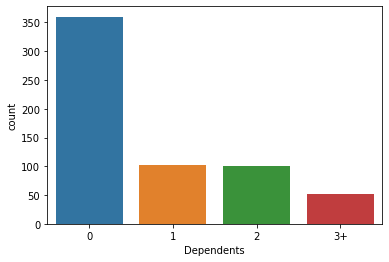

In [716]:
# Checking Dependents column
sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

In [717]:
# from above plot we can say that
# 360 candidate has no dependent. 
# 102 candidates have 1 dependent. 
# 101 candidates have 2 dependent. 
# 51 candidates have 3+ dependent. 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


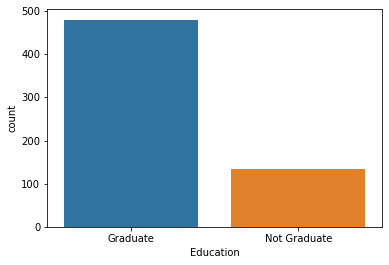

In [718]:
# Checking Education column
sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

In [719]:
# out of 614 candidate. 480 peoples are graduate and 134 are non graduate.
# Majority are Graduate

No     532
Yes     82
Name: Self_Employed, dtype: int64


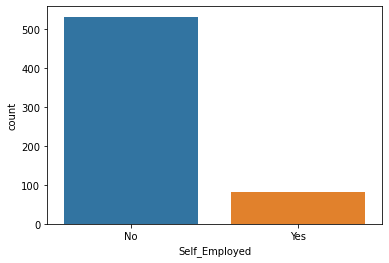

In [720]:
# Checking Self_Employed column
sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())

In [721]:
# from above plot we can say that
# 531 candidate are not self employed.  (Majority)
# 82 candidates have self employed.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


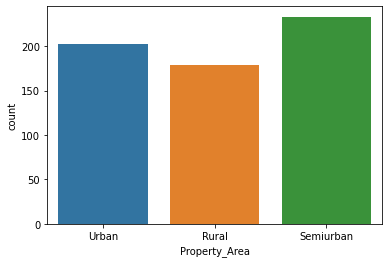

In [722]:
# Checking Property_Area column
sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())

In [723]:
# Property is distributed in Urban Rural and semiurban area.
# Semiurban has major property area.
# Urban and Rural have approx equal property area.

Y    422
N    192
Name: Loan_Status, dtype: int64


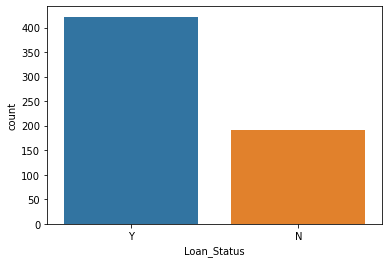

In [724]:
# we have checked all the categorical attributes. 
# Our Target Variabale is also Categorical so we will also chek the target variable counts.

# Checking Loan_Status  column which is our target variable.
sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

In [725]:
# from above plot we can say that maximum person loan as been approved (422) and 192 people could not got approval for their loan.

In [726]:
# We have checked all categorical column by count plot.
# Now we will check the continuous data by distplot.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

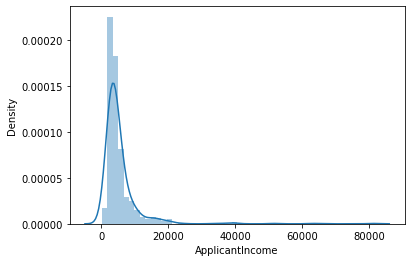

In [727]:
sns.distplot(df['ApplicantIncome'])

In [728]:
# from above plot we can say that maximum person having their income slab between 0-15K and some are outliers.
# Also data is not properly distributed. so we will trea it.

In [729]:
# We will apply long transformation to this feature.
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

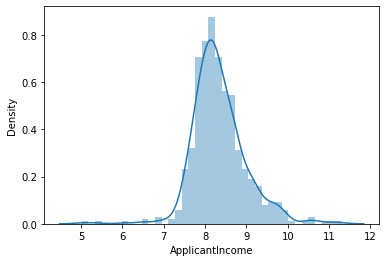

In [730]:
# Now we will again check the data distribution after apply long transformtion in this feature.
sns.distplot(df['ApplicantIncome'])

In [731]:
# Now data is looking normally distributed of this feature for better training the model

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

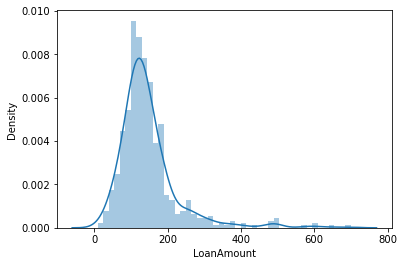

In [732]:
sns.distplot(df['LoanAmount'])

In [733]:
# from above plot we can say that maximum person applied for loan amount of range 0-200 and some are outliers. but why any person will apply for Zero loan. so this data is not equally distributed.
# so we will apply log transformation method to this feature.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

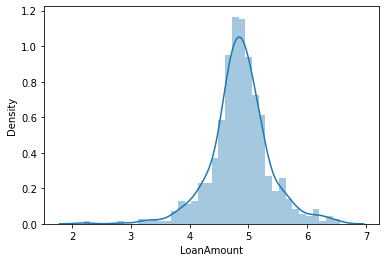

In [734]:
# We will apply long transformation to this feature.
df['LoanAmount']=np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount'])

In [735]:
# Now this feature is looking normally distributed.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

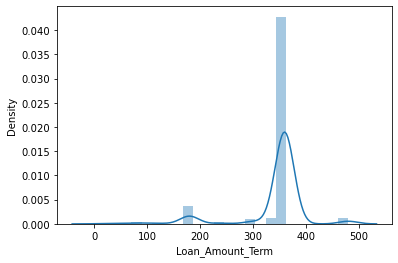

In [736]:
# Checking loan amount term feature with distribution plot.

sns.distplot(df['Loan_Amount_Term'])

In [737]:
# We can see that data is not normally distributed.
# WE can say maximum loan amount term between 300-400 which in not  looking normal.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

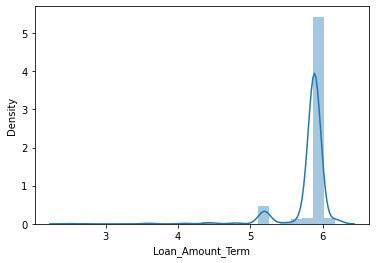

In [738]:
# We will apply long transformation to this feature.
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term'])

In [739]:
# Now we can say maximum person choose the loan term is approx. 6 years

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

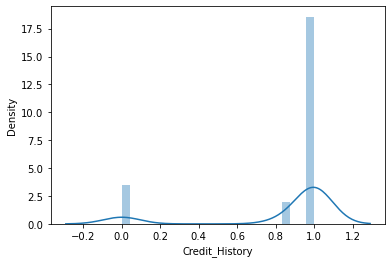

In [740]:
# Checking loan amount term feature with distribution plot.

sns.distplot(df['Credit_History'])

In [741]:
# From above plot we can say that all credit History lies between 0-1 range. so no need to apply any transformation method to this attribute.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

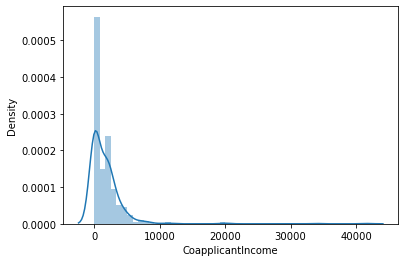

In [742]:
sns.distplot(df['CoapplicantIncome'])

In [743]:
# from above plot we can say that how one person income can be zero. so its look that this is not normally distributed data.
# We will use log transformation method for it

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

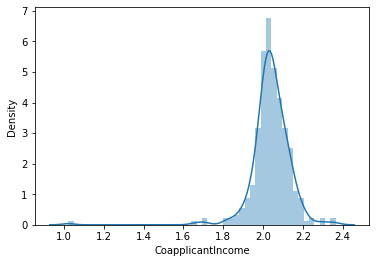

In [745]:
df['CoapplicantIncome']=np.log(df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncome'])

In [ ]:
# Now the income distribution looking normal.

In [746]:
df['CoapplicantIncome'].unique()

array([       nan, 1.99041079, 2.04969974, 2.12128945, 1.99113349,
       2.05740613, 1.9920308 , 2.23030868, 1.87962997, 2.01723641,
       2.19726456, 2.07336805, 1.94451725, 2.09930768, 2.15582096,
       2.02226015, 2.02267497, 2.07706995, 2.04381669, 1.93830646,
       2.03360235, 2.09462214, 2.00401474, 2.08023717, 2.03259277,
       1.97309919, 1.98588697, 2.18416458, 2.00409557, 1.96021476,
       2.04849192, 2.09718651, 2.04507462, 2.00214027, 1.95475543,
       1.99770505, 2.04072834, 2.04364408, 2.07420626, 2.10920702,
       2.09750732, 2.13211986, 2.04387417, 2.08295151, 2.01973983,
       2.01236543, 2.13604632, 2.08114935, 2.11553835, 2.03870254,
       2.02016367, 2.05877569, 2.02826698, 2.03578056, 2.12045771,
       2.07599386, 2.1564163 , 2.01578154, 2.04659981, 1.93220969,
       2.1007338 , 2.09067846, 2.10952618, 2.10217562, 1.8909096 ,
       1.93691468, 1.9496783 , 2.10275383, 2.04832623, 2.11892076,
       2.04552865, 1.98000759, 2.03725081, 2.06543256, 2.20857

In [747]:
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [748]:
df['CoapplicantIncome']=df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean())

In [749]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Creating New Column

In [ ]:
# We can see, in out data, who are married having applicant and their coapplicant income. so we can add these both features.
# we will named new column as Total_Income which will included applicant and coapplicant income.


In [750]:
df['Total_Income']=df['CoapplicantIncome']+df['ApplicantIncome']
df.head() 
# Checking the data set after adding above features.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,8.674026,2.039835,4.986426,5.886104,1.0,Urban,Y,10.713861
1,Male,Yes,1,Graduate,No,8.430109,1.990411,4.852030,5.886104,1.0,Rural,N,10.420520
2,Male,Yes,0,Graduate,Yes,8.006368,2.039835,4.189655,5.886104,1.0,Urban,Y,10.046203
3,Male,Yes,0,Not Graduate,No,7.856707,2.049700,4.787492,5.886104,1.0,Urban,Y,9.906407
4,Male,No,0,Graduate,No,8.699515,2.039835,4.948760,5.886104,1.0,Urban,Y,10.739350


In [ ]:
# Apply Log transformation of every continuous feature.

In [751]:
df['LoanAmountlog']=np.log(df['LoanAmount'])

df['ApplicantIncomelog']=np.log(df['ApplicantIncome'])

df['Loan_Amount_Termlog']=np.log(df['Loan_Amount_Term'])

df['Total_Incomelog']=np.log(df['Total_Income'])

df['CoapplicantIncomelog']=np.log(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmountlog', ylabel='Density'>

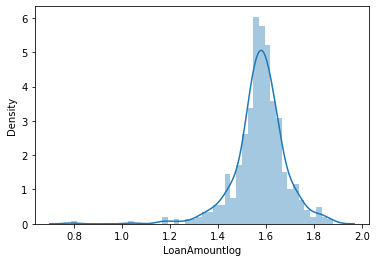

In [752]:
sns.distplot(df['LoanAmountlog'])

<AxesSubplot:xlabel='ApplicantIncomelog', ylabel='Density'>

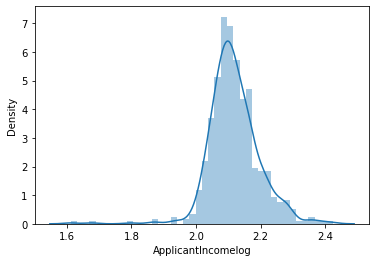

In [753]:
sns.distplot(df['ApplicantIncomelog'])

<AxesSubplot:xlabel='Loan_Amount_Termlog', ylabel='Density'>

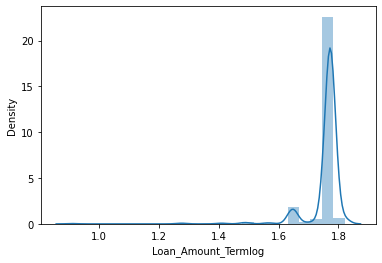

In [754]:
sns.distplot(df['Loan_Amount_Termlog'])

<AxesSubplot:xlabel='Total_Incomelog', ylabel='Density'>

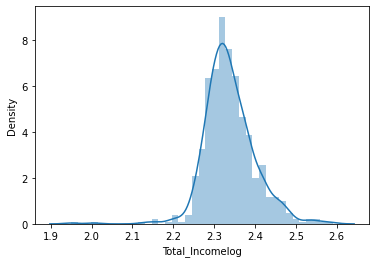

In [755]:
sns.distplot(df['Total_Incomelog'])

# Correlation Matrix

In [756]:
from matplotlib import pyplot as plt
import matplotlib

In [757]:
# We will check the correlation between features vs label with heatmap.

<AxesSubplot:>

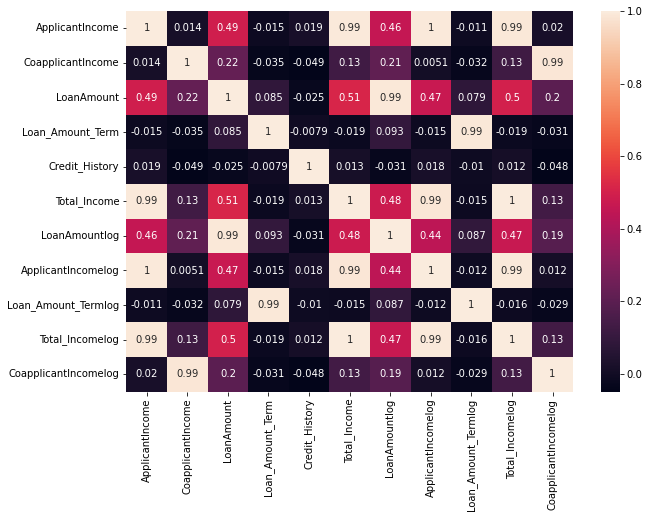

In [758]:
corr=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)

In [759]:
# We will dropp some column as these are already converted in log.

In [760]:
# We are deleting below attributes 
# Applicantincome & coapplicantincome: We have combined both the feature in Total_income
# loan amount: We have taken log values of this column.
# Loan amount term: We have taken log values of this column.
# So we are dropping them.

In [761]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income']
df=df.drop(cols,axis=1)

In [762]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmountlog,ApplicantIncomelog,Loan_Amount_Termlog,Total_Incomelog,CoapplicantIncomelog
0,Male,No,0,Graduate,No,1.0,Urban,Y,1.606719,2.160333,1.772594,2.371538,0.712869
1,Male,Yes,1,Graduate,No,1.0,Rural,N,1.579397,2.131810,1.772594,2.343777,0.688341
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,1.432618,2.080237,1.772594,2.307195,0.712869
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,1.566007,2.061368,1.772594,2.293182,0.717693
4,Male,No,0,Graduate,No,1.0,Urban,Y,1.599137,2.163267,1.772594,2.373915,0.712869


In [763]:
df=df.drop(['CoapplicantIncomelog'],axis=1)


In [764]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmountlog,ApplicantIncomelog,Loan_Amount_Termlog,Total_Incomelog
0,Male,No,0,Graduate,No,1.0,Urban,Y,1.606719,2.160333,1.772594,2.371538
1,Male,Yes,1,Graduate,No,1.0,Rural,N,1.579397,2.131810,1.772594,2.343777
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,1.432618,2.080237,1.772594,2.307195
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,1.566007,2.061368,1.772594,2.293182
4,Male,No,0,Graduate,No,1.0,Urban,Y,1.599137,2.163267,1.772594,2.373915


# Label Encoding of Categorical columns

In [765]:
from sklearn.preprocessing import LabelEncoder

In [766]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmountlog',
       'ApplicantIncomelog', 'Loan_Amount_Termlog', 'Total_Incomelog'],
      dtype='object')

In [767]:
cols=['Gender','Married','Self_Employed','Property_Area','Loan_Status','Married','Education','Dependents']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [768]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmountlog,ApplicantIncomelog,Loan_Amount_Termlog,Total_Incomelog
0,1,0,0,0,0,1.0,2,1,1.606719,2.160333,1.772594,2.371538
1,1,1,1,0,0,1.0,0,0,1.579397,2.131810,1.772594,2.343777
2,1,1,0,0,1,1.0,2,1,1.432618,2.080237,1.772594,2.307195
3,1,1,0,1,0,1.0,2,1,1.566007,2.061368,1.772594,2.293182
4,1,0,0,0,0,1.0,2,1,1.599137,2.163267,1.772594,2.373915


# Train Test Split 

In [769]:
# Specify input and output variable
x=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

In [770]:
from sklearn.model_selection import train_test_split

In [783]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.25,random_state=213)

# Model Training 

In [796]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [811]:
# Classification Model Function

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy Score is ", model.score(x_test,y_test)*100)
    score=cross_val_score(model,x,y,cv=5) # taking cv=5 for better model validation
    print ("Cross Validation Score is", np.mean(score)*100)

In [798]:
#I have defined a class that will perform the train-test split, training of model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score.

In [812]:
#Logistic Regression
model=LogisticRegression()
classify(model,x,y)

Accuracy Score is  77.27272727272727
Cross Validation Score is 80.9462881514061


In [814]:
#Support Vector Classifier
from sklearn.svm import SVC

In [815]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, x, y)

Accuracy Score is  77.27272727272727
Cross Validation Score is 80.9462881514061


In [816]:
# Decision Tree Classifier
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, x, y)

Accuracy Score is  70.77922077922078
Cross Validation Score is 71.98853791816606


In [817]:
# Random Forest Classifier
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x, y)

Accuracy Score is  78.57142857142857
Cross Validation Score is 78.50193256030921


In [818]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, x, y)

Accuracy Score is  72.72727272727273
Cross Validation Score is 76.05491136878581


From all above differents models Random Forest Classifier is providing better result.

# Hyperparameter Tuning

In [824]:
model=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7, max_features=1)
classify(model, x, y)

Accuracy Score is  76.62337662337663
Cross Validation Score is 80.45715047314408


In [825]:
# We have tune the number of estimator to 100 and found the CV Score 80.46% Score.